<a href="https://colab.research.google.com/github/samarthm04/ComputerVision_0_to_Hero/blob/main/dummy_variables%26one_hot_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One hot encoding is used for questions like this, where another independent variable is added, which categorically divides the data.

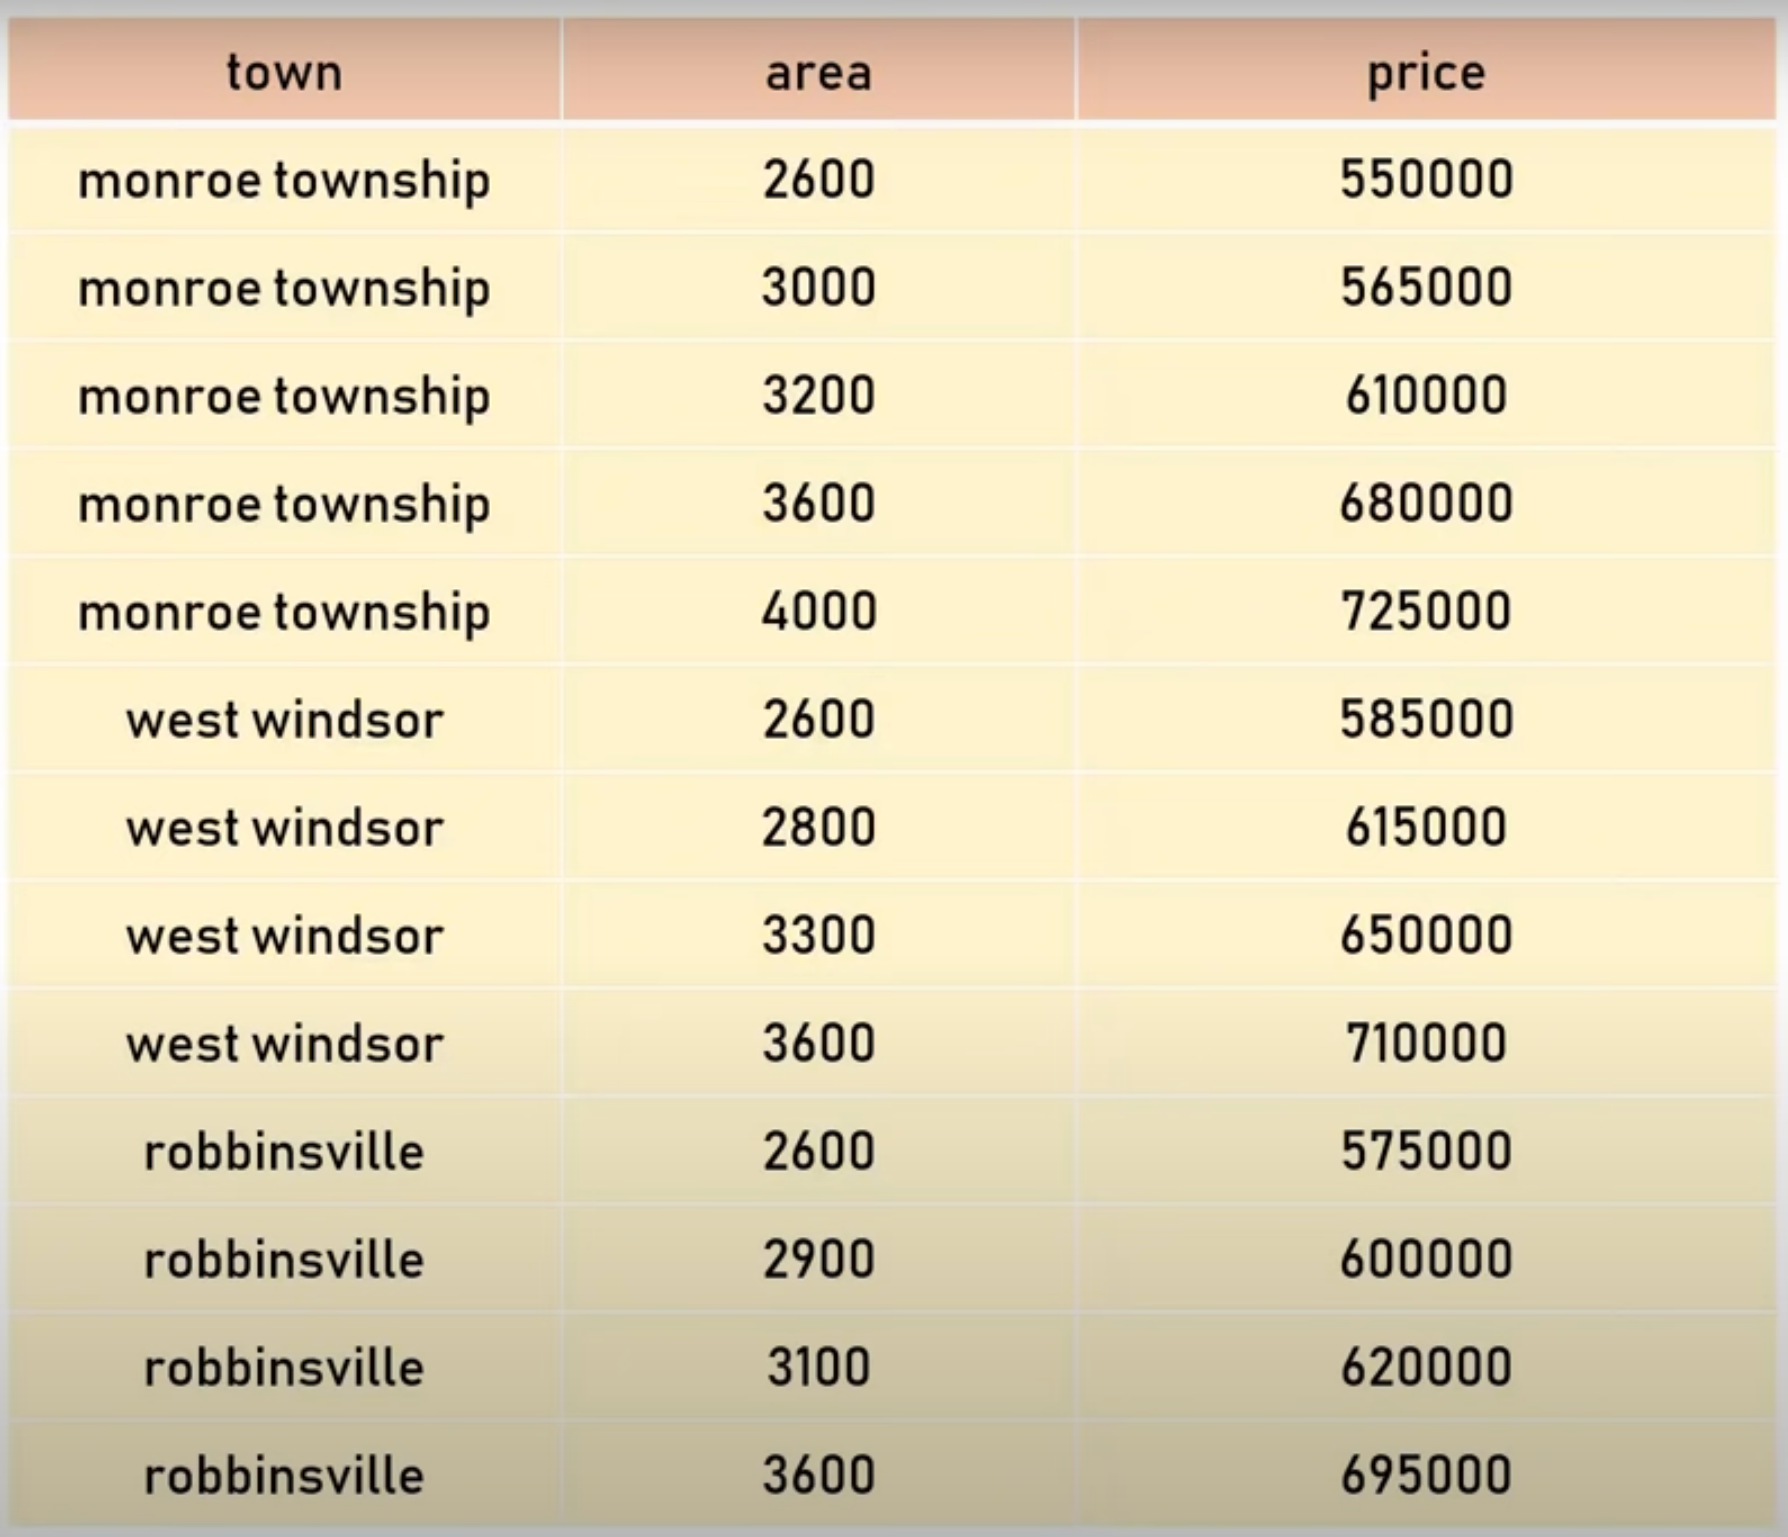

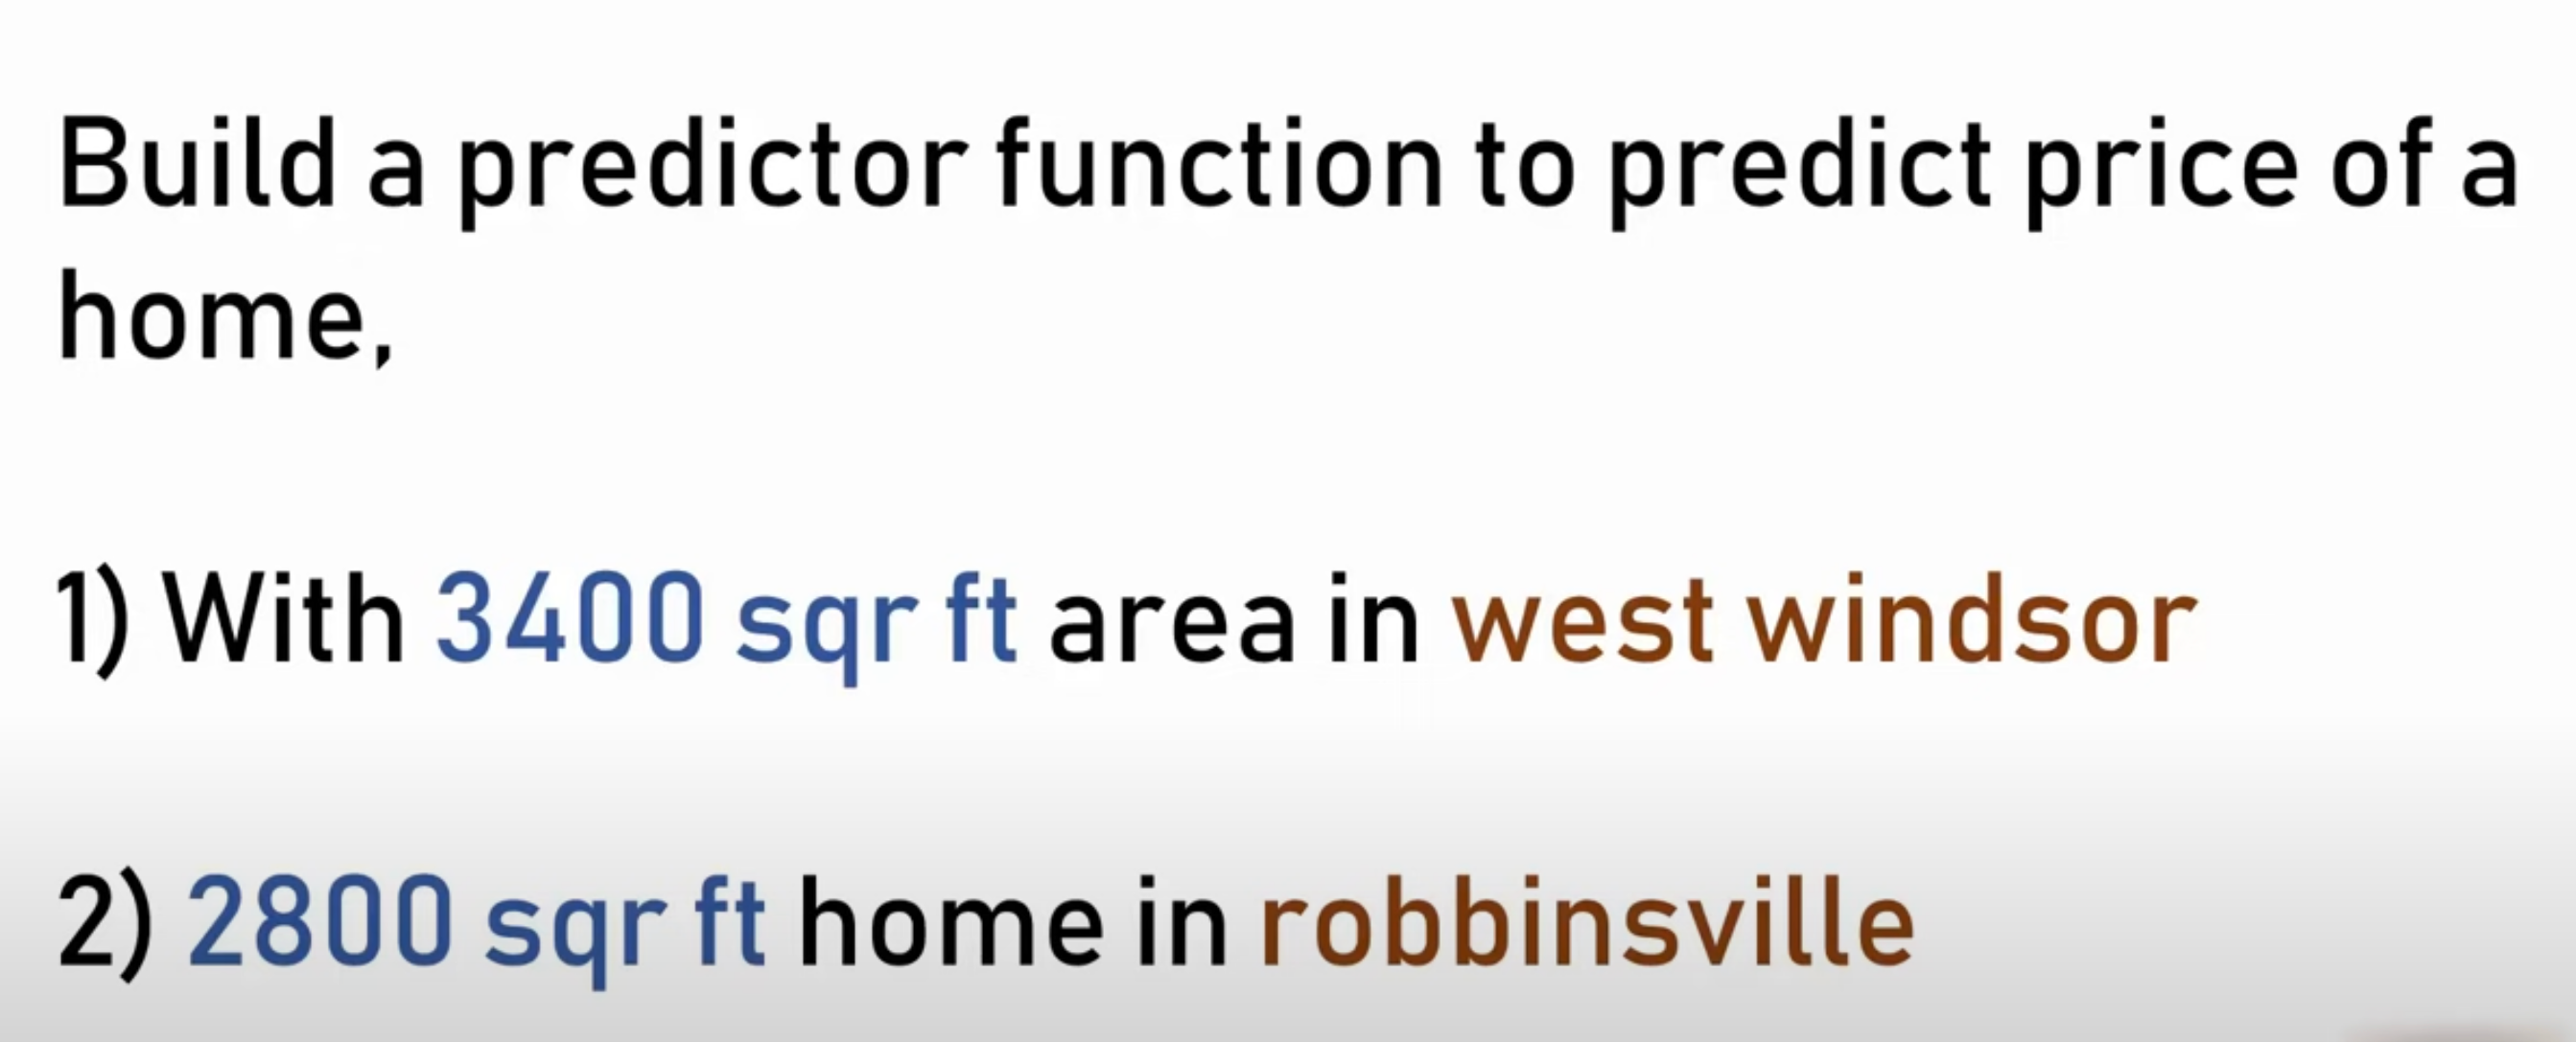

The method used below is called One hot encoding, and the new variables created in the process are called dummy variables

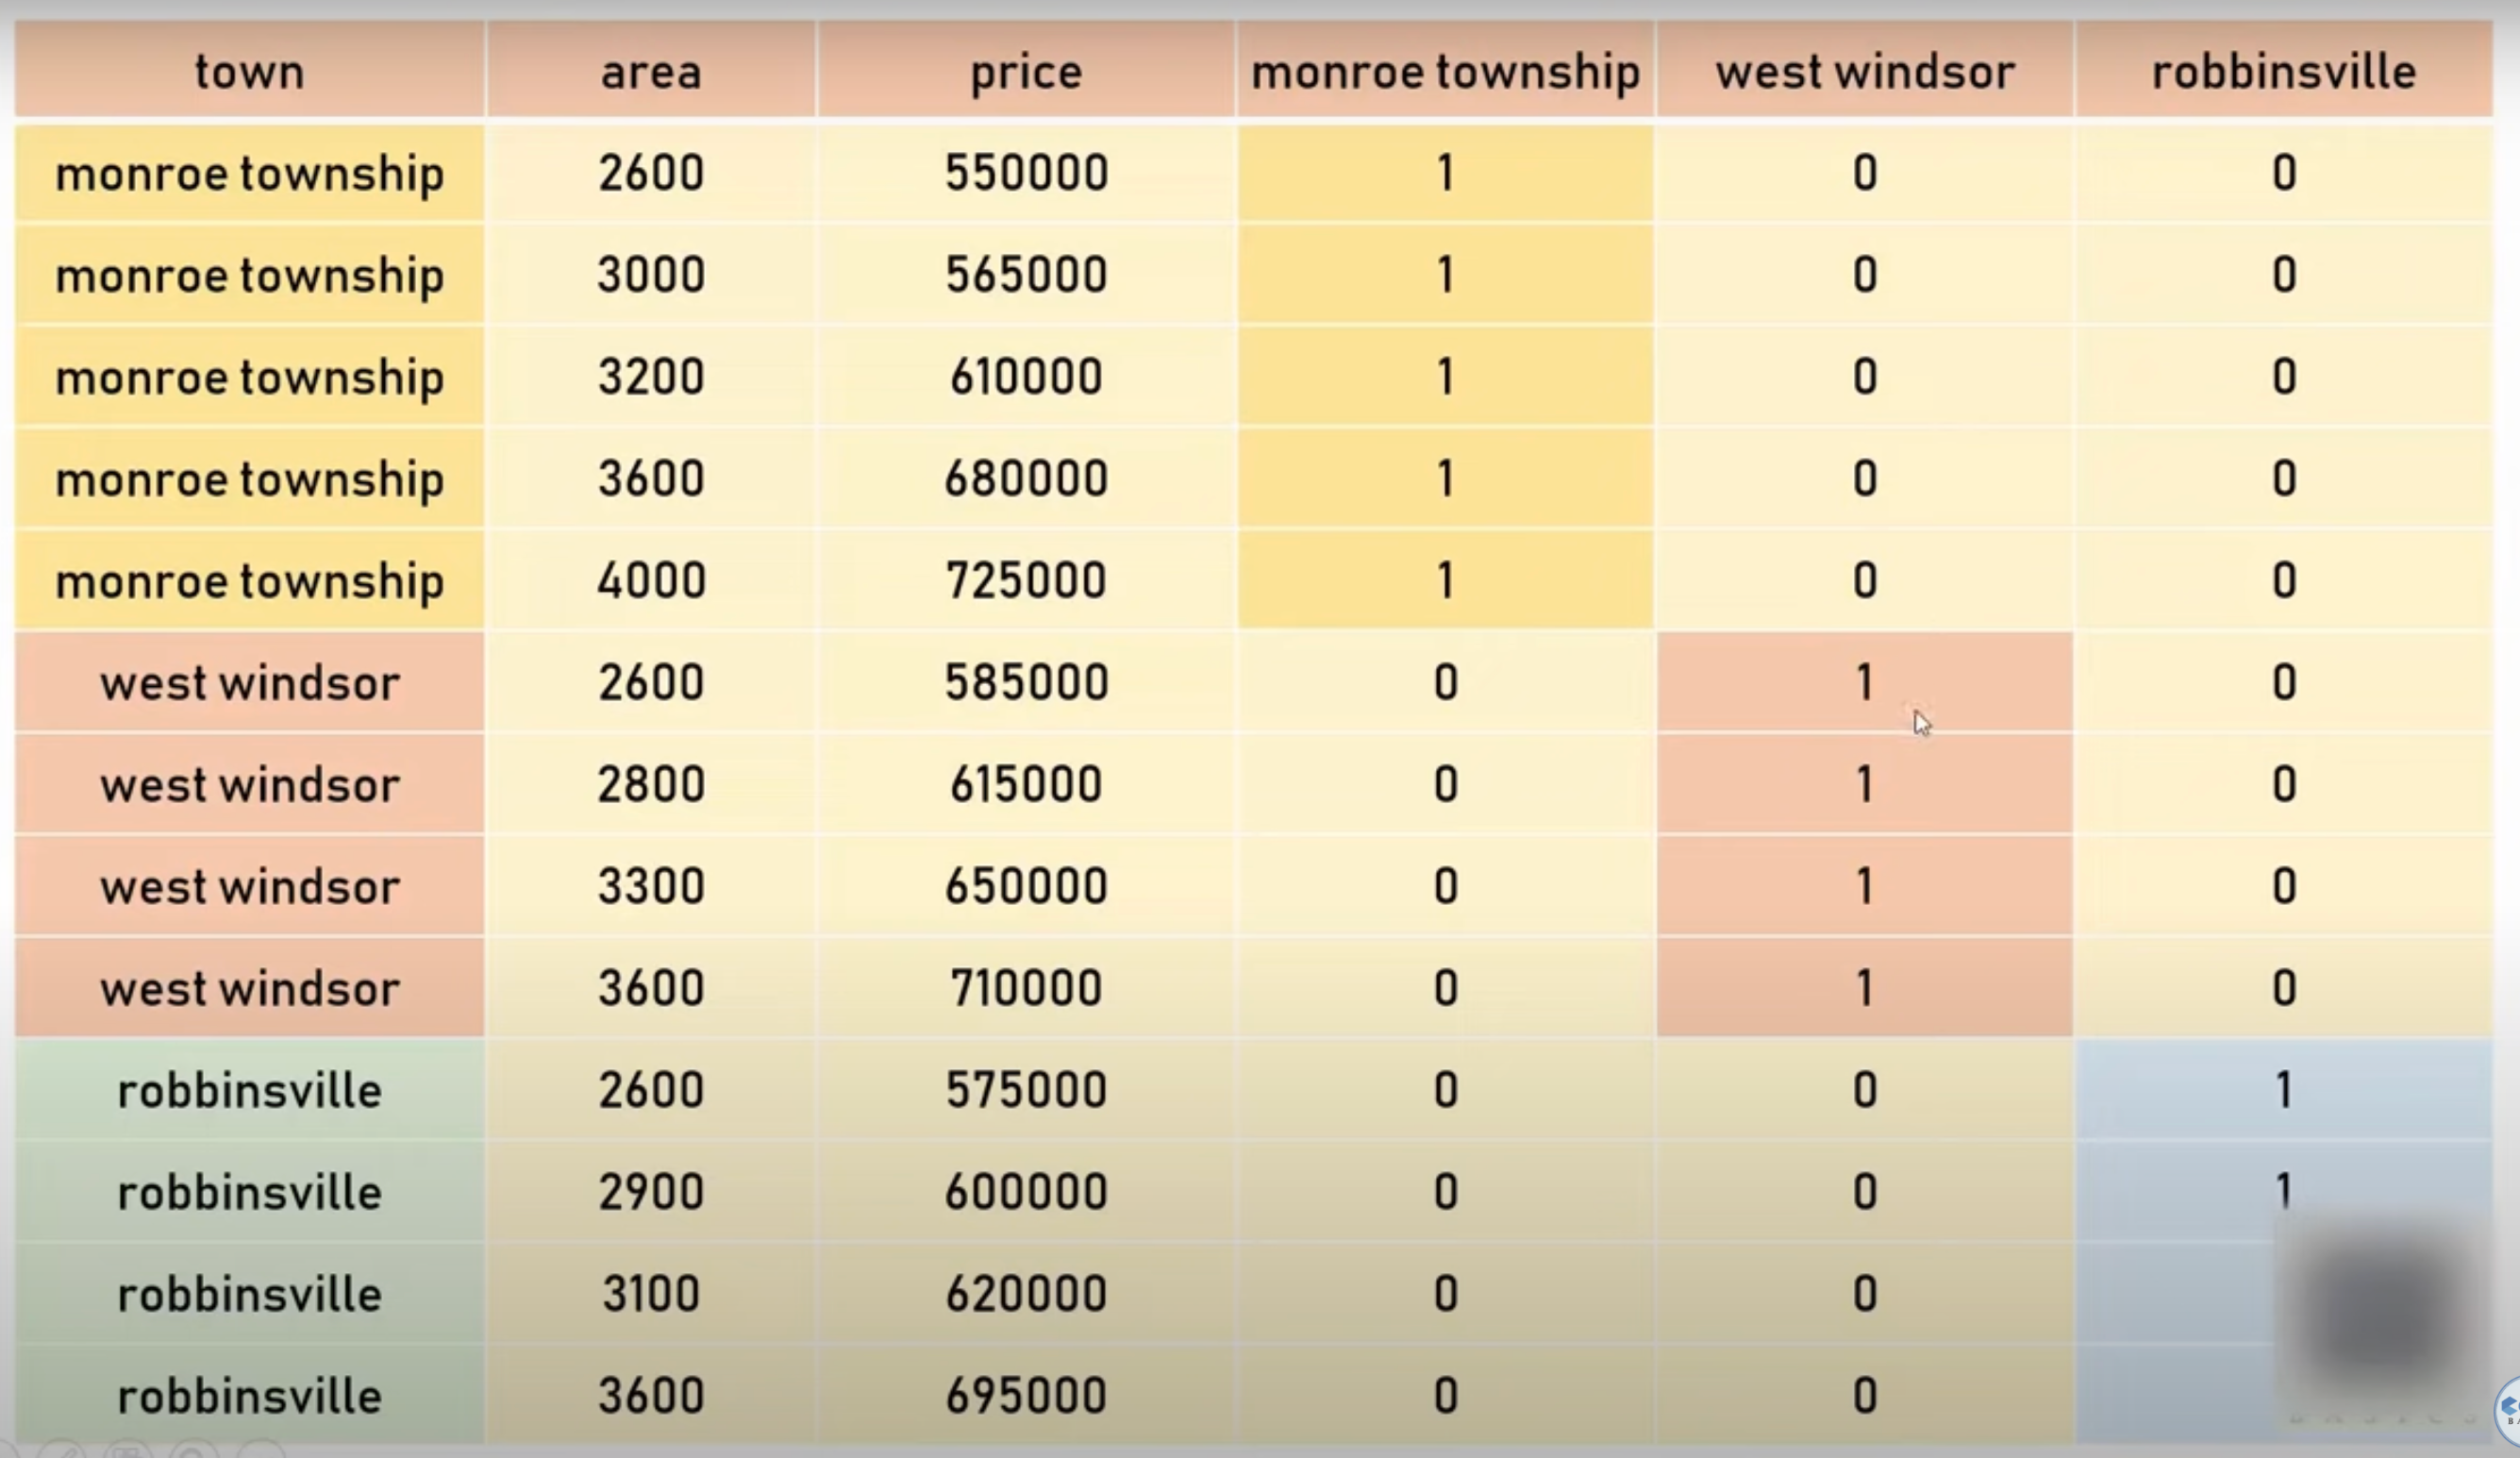

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [6]:
df=pd.read_csv("homeprices (1).csv")

In [7]:
df #towns are different and are words so they should be one hot encoded

town  area   price
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000

In [8]:
import math

In [9]:
dummies=pd.get_dummies(df.town).astype(int)

In [10]:
merged_df=pd.concat([df,dummies], axis='columns')##this is how you concatenatw two columns/rows

In [11]:
merged_df

town  area   price  monroe township  robinsville  west windsor
0   monroe township  2600  550000                1            0             0
1   monroe township  3000  565000                1            0             0
2   monroe township  3200  610000                1            0             0
3   monroe township  3600  680000                1            0             0
4   monroe township  4000  725000                1            0             0
5      west windsor  2600  585000                0            0             1
6      west windsor  2800  615000                0            0             1
7      west windsor  3300  650000                0            0             1
8      west windsor  3600  710000                0            0             1
9       robinsville  2600  575000                0            1             0
10      robinsville  2900  600000                0            1             0
11      robinsville  3100  620000                0            1             0
12      robinsville  3600  695000                0            1             0

drop town column since that is not needed now.

we must also drop one of the columns of dumy variables--> due to the problem of 'dummy variable trap'

this means that if two columns have their values it is understood that the third one which is zero in both columns will be one later,

The dummy variable trap occurs when one or more dummy variables are redundant, meaning they can be predicted from the other variables. In the above example, if we also create a dummy variable "RED", then we have created a redundant variable because if "BLUE" and "GREEN" are both 0, then the data point must be red.



drop town column name

**DROP ONE DUMMY VARIABLE COLUMN:**
PREVENTING DUMMY VARIABLE TRAP

In [12]:
final=merged_df.drop(['town','west windsor'], axis='columns')

In [13]:
final

area   price  monroe township  robinsville
0   2600  550000                1            0
1   3000  565000                1            0
2   3200  610000                1            0
3   3600  680000                1            0
4   4000  725000                1            0
5   2600  585000                0            0
6   2800  615000                0            0
7   3300  650000                0            0
8   3600  710000                0            0
9   2600  575000                0            1
10  2900  600000                0            1
11  3100  620000                0            1
12  3600  695000                0            1

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
model=LinearRegression()

now divide the dataset into dependent and indepenedent variables(x,y)

In [25]:
X=final.drop(['price'], axis='columns')
X

area  monroe township  robinsville
0   2600                1            0
1   3000                1            0
2   3200                1            0
3   3600                1            0
4   4000                1            0
5   2600                0            0
6   2800                0            0
7   3300                0            0
8   3600                0            0
9   2600                0            1
10  2900                0            1
11  3100                0            1
12  3600                0            1

In [24]:
y=final['price']
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [26]:
model.fit(X,y)

LinearRegression()

now the model has been trained, lets fit in the values of thw question:

In [28]:
model.predict([[3400,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [29]:
model.predict([[2800,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [30]:
model.score(X,y)

0.9573929037221872